<a href="https://colab.research.google.com/github/ValentynaGrach/ml-homeworks/blob/main/%D0%94%D0%97_6_ML_metrics_Metric_models_ValentynaGrach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1️⃣ Завантаження та первиний аналіз датасету abalone

In [ ]:
from google.colab import files
import pandas as pd
from google.colab import data_table
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay, classification_report,
                             precision_recall_curve)


# Завантажуємо та зберігаємо в датафрейм abalone
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
abalone = pd.read_csv(file_name, header=None)

# Додаємо назви стовпців
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

# Виводимо повідомлення про успішне завантаження файлу
print("✅ Файл", file_name, "зчитано успішно. Розмір:", abalone.shape)

# Показуємо перші рядки зчитаного файлу
print("\n📌 Перші рядки файлу", file_name, ":")
display(data_table.DataTable(abalone.head()))

Saving abalone.data to abalone.data
✅ Файл abalone.data зчитано успішно. Розмір: (4177, 9)

📌 Перші рядки файлу abalone.data :


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## первинний аналіз даних

In [ ]:
# Перевірка на пропуски
print("\n🔍 Перевірка на пропуски в abalone:")
print(abalone.isnull().sum())

# Перевірка форматів всіх стовпців
print("\n🔹 Формати стовпців у abalone:")
print(abalone.dtypes)

# Огляд статистичних характеристик
print("\n📊 Статистичні характеристики для abalone:")
display(abalone.describe())

# перевірка на дублікати
duplicates = abalone.duplicated().sum()
print("\n🔍 Кількість дублікатів:", duplicates)


🔍 Перевірка на пропуски в abalone:
Sex              0
Length           0
Diameter         0
Height           0
WholeWeight      0
ShuckedWeight    0
VisceraWeight    0
ShellWeight      0
Rings            0
dtype: int64

🔹 Формати стовпців у abalone:
Sex               object
Length           float64
Diameter         float64
Height           float64
WholeWeight      float64
ShuckedWeight    float64
VisceraWeight    float64
ShellWeight      float64
Rings              int64
dtype: object

📊 Статистичні характеристики для abalone:


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000



🔍 Кількість дублікатів: 0


📌 Датасет не містить пропущених значень чи дублікатів ✅, а статистичні характеристики числових змінних вказують на те, що значення в межах логічних діапазонів 📊. Викиди можуть бути присутніми в деяких змінних, таких як "Height" і "WholeWeight"⚠️, де є великі розбіжності між мінімальними та максимальними значеннями.

📂 Щоб точно визначити наявність викидів у змінних "Height" і "WholeWeight", потрібно проаналізувати їх за допомогою графіків (наприклад, boxplot)

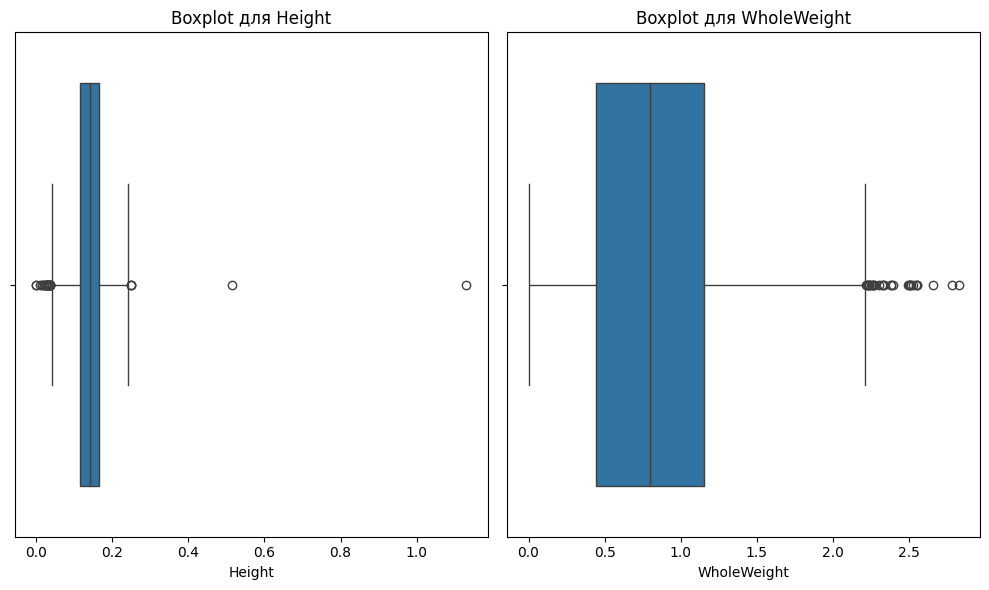

In [ ]:
# Побудова boxplot для змінних 'Height' та 'WholeWeight'
plt.figure(figsize=(10, 6))

# Boxplot для "Height"
plt.subplot(1, 2, 1)
sns.boxplot(x=abalone['Height'])
plt.title('Boxplot для Height')

# Boxplot для "WholeWeight"
plt.subplot(1, 2, 2)
sns.boxplot(x=abalone['WholeWeight'])
plt.title('Boxplot для WholeWeight')

plt.tight_layout()
plt.show()

📊 Змінна **Height** має викиди на нижньому кінці, а **WholeWeight** — на верхньому, де є значно більше викидів ⚠️.

## перевірити викиди (outliers)

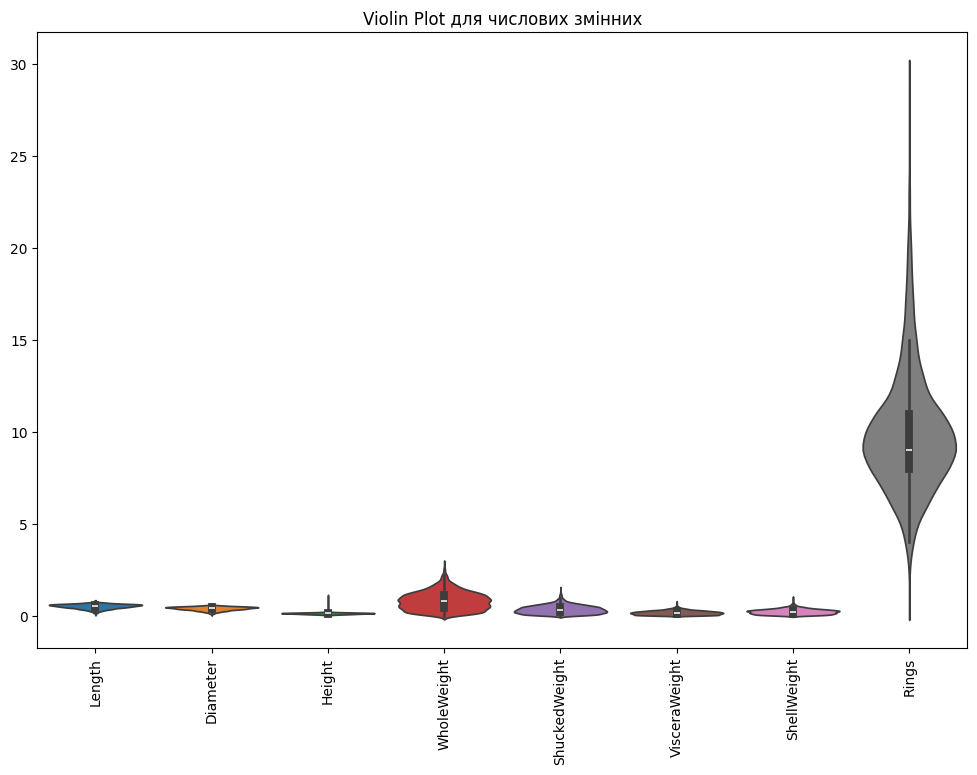

In [ ]:
# Перевірка на викиди (outliers) за допомогою violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=abalone.select_dtypes(include=['float64', 'int64']))
plt.title("Violin Plot для числових змінних")
plt.xticks(rotation=90)
plt.show()

Згідно з **violin plot** 📊, змінні **WholeWeight** і **ShellWeight** мають більш широкий розподіл та викиди ⚠️, тоді як інші змінні, такі як **Length**, **Diameter** і **Height**, мають більш вузький і однорідний розподіл 🔍.

## перевірити кореляції між фічами

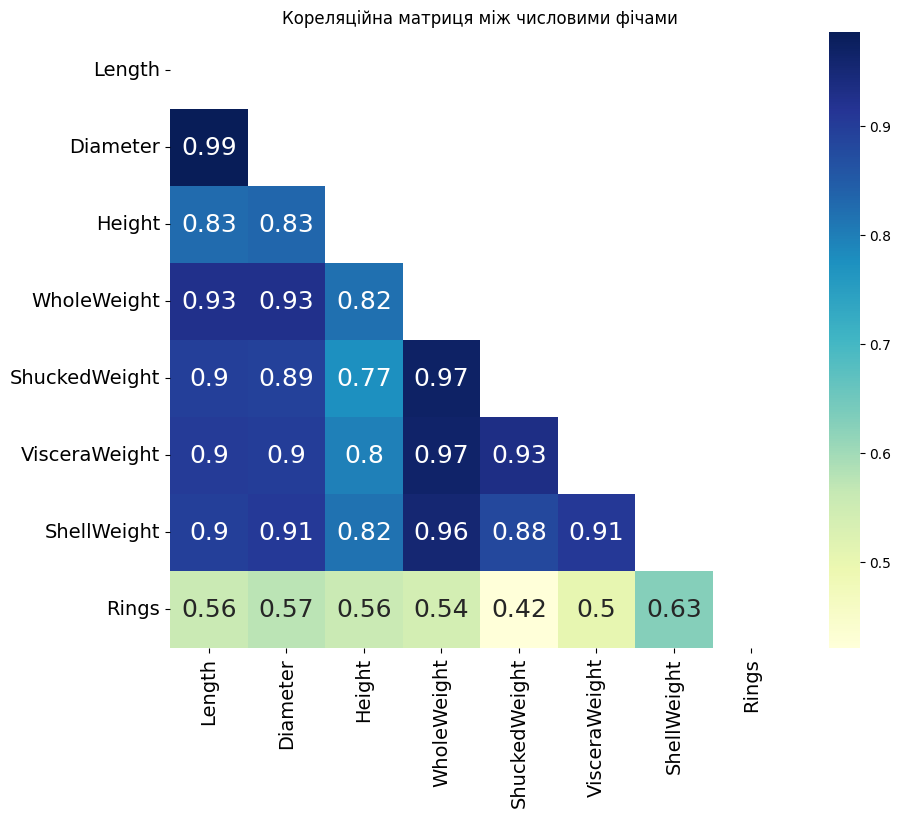

In [ ]:
# Перевірка кореляцій між числовими фічами (кореляційна матриця)
corr_matrix = abalone.select_dtypes(include=['float64', 'int64']).corr()

# Візуалізація кореляційної матриці heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":18}, mask=mask)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Кореляційна матриця між числовими фічами")
plt.show()

Згідно з кореляційною матрицею 📊, **Diameter**, **Length**, **WholeWeight**, **ShuckedWeight**, **VisceraWeight** та **ShellWeight** мають дуже високу кореляцію (0.8-0.99) 🔗, а **Rings** (таргет) має помірну кореляцію з іншими фічами ⚖️, найбільше з **ShellWeight** (0.63) 📉.

## pairplot для числових фіч

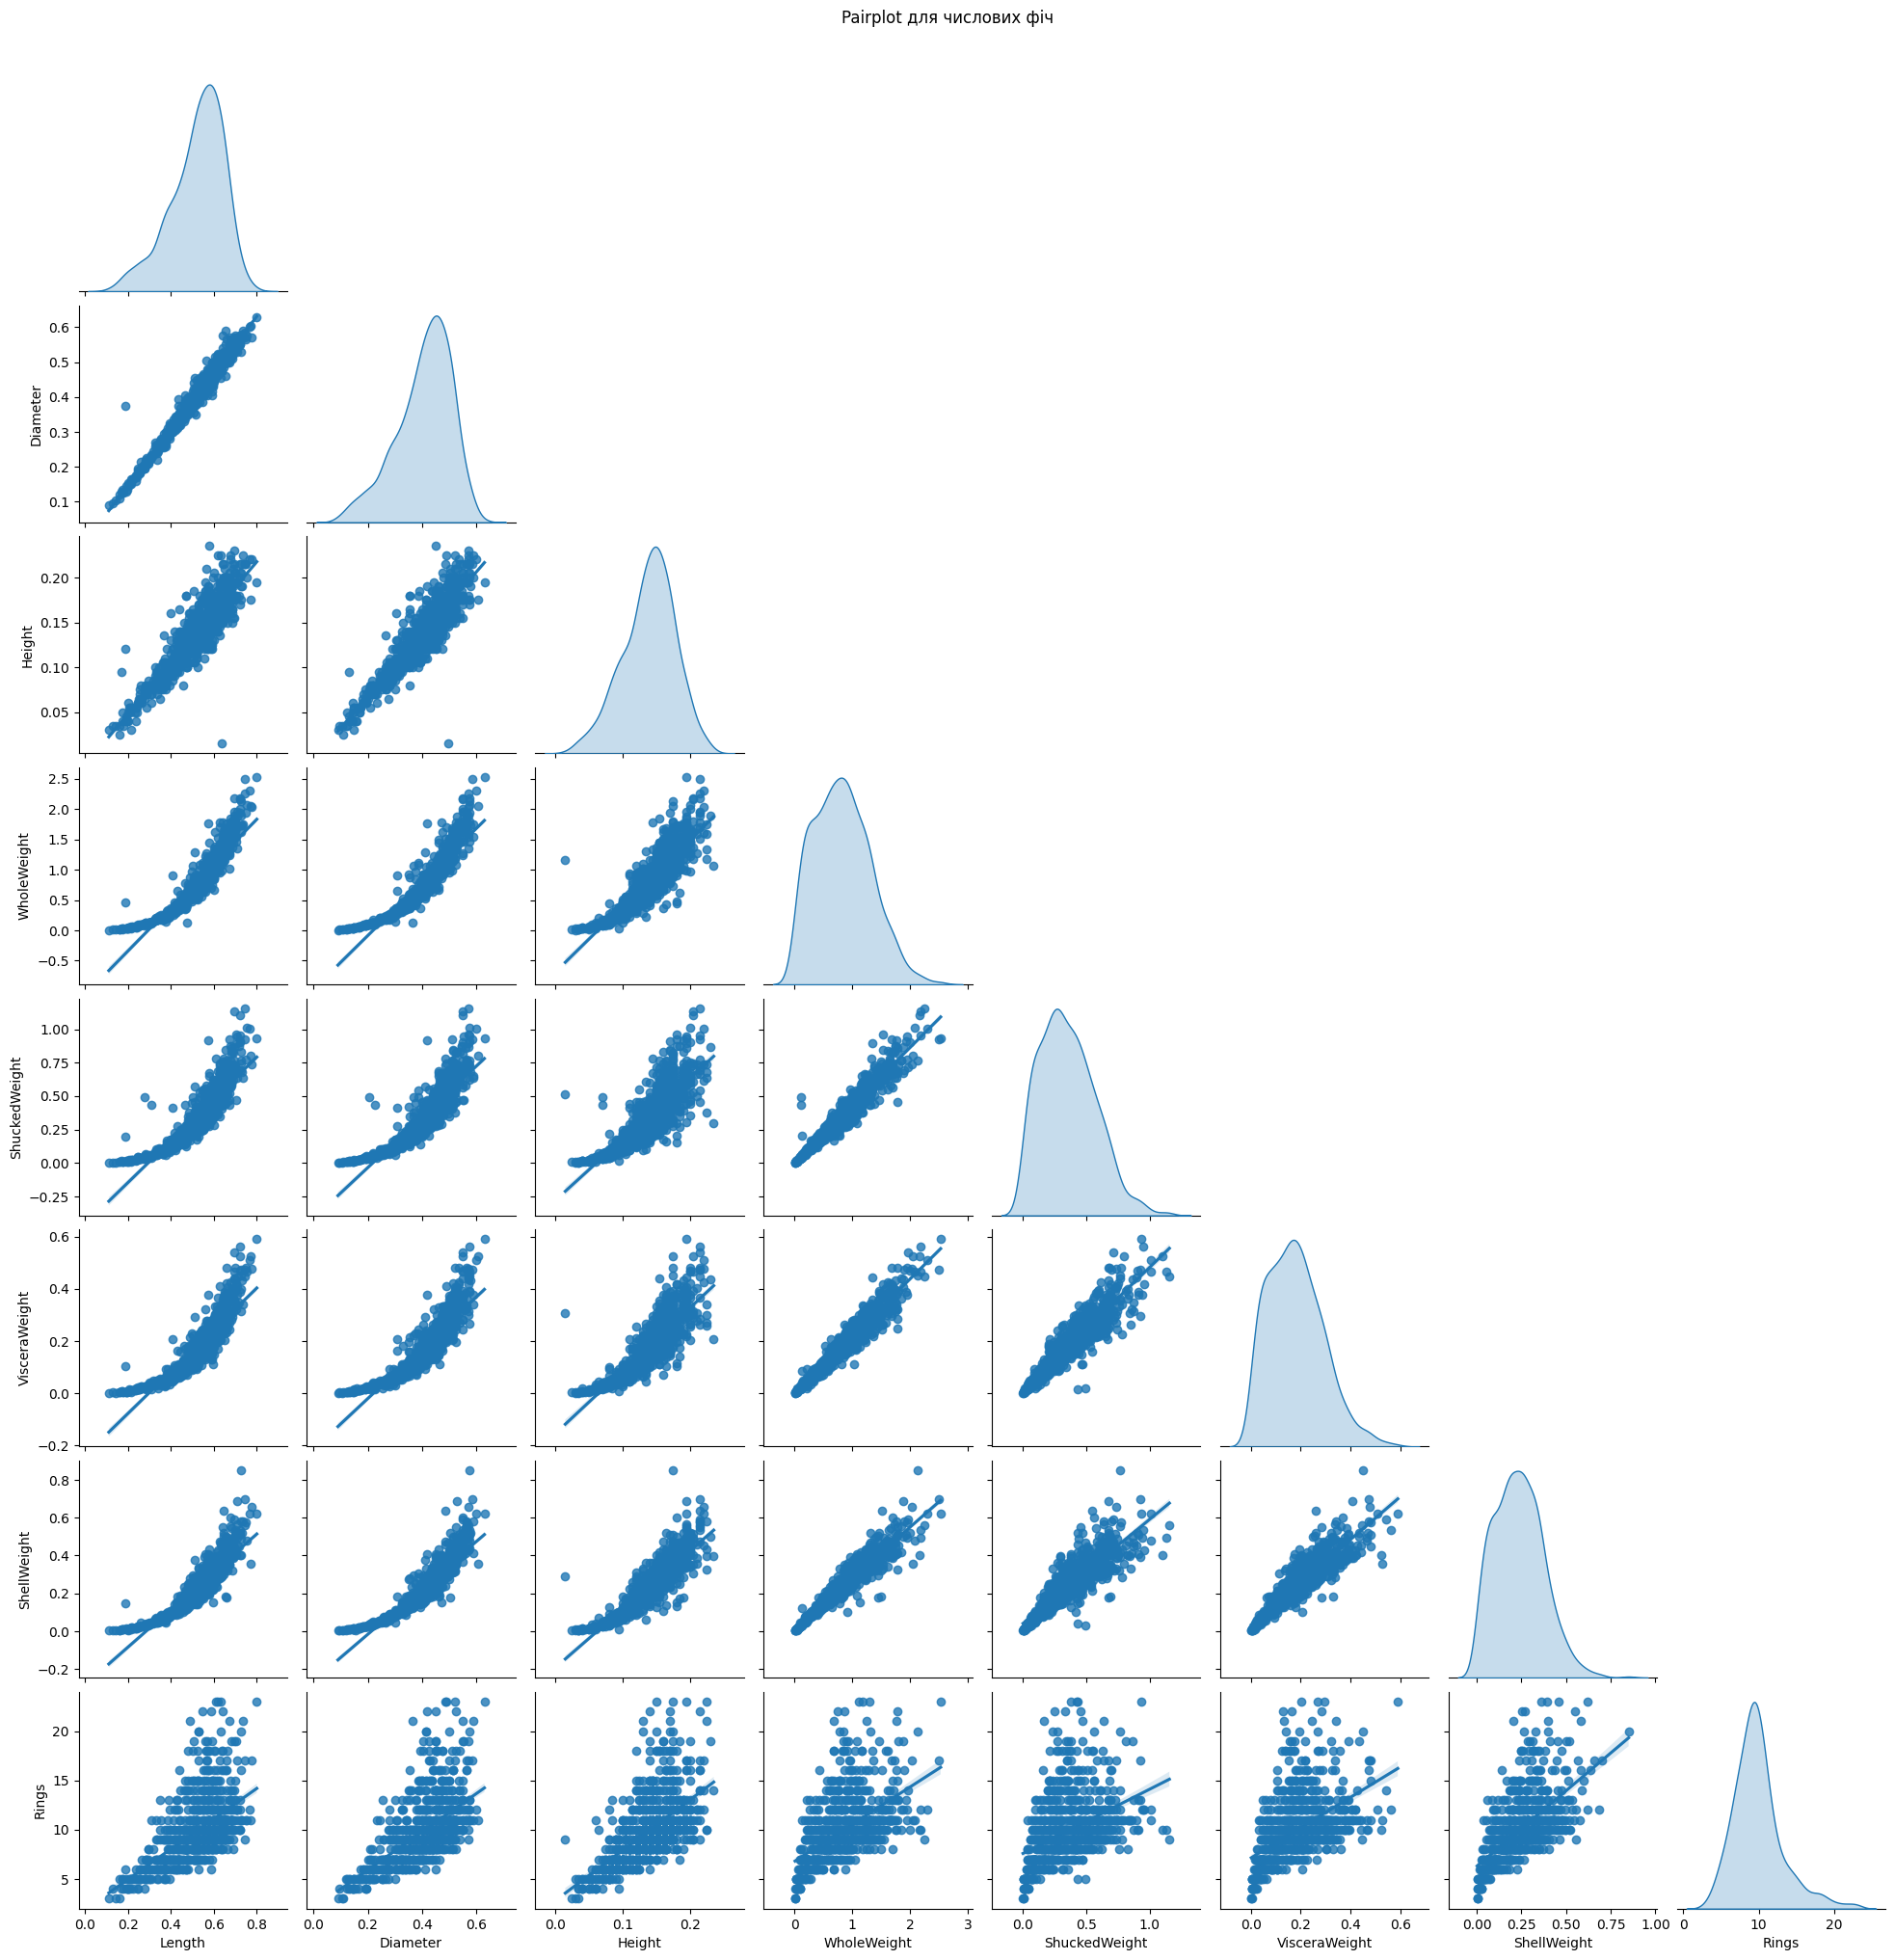

In [ ]:
# Використовуємо sample для вибірки 20% даних
sns.pairplot(abalone.sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='kde')
plt.suptitle("Pairplot для числових фіч", y=1.02)
plt.show()

Згідно з **pairplot** 📊, більшість числових змінних мають високу кореляцію 🔗, а **Rings** (таргет) помірно корелює з **WholeWeight** та **ShellWeight** ⚖️, вказуючи на взаємозв'язок між віком і вагою абалону.

# 2️⃣ Побудува модель класифікації

## **попередня обробка даних:**

1. Перетворення категоріальних змінних (стать "Sex") в числові значення.

In [ ]:
# Створення нового датасету, де категоріальна змінна "Sex" буде перетворена в числові значення
abalone_new = abalone.copy()  # Створюємо копію датасету
label_encoder = LabelEncoder()
abalone_new['Sex'] = label_encoder.fit_transform(abalone_new['Sex'])  # M=2, F=1, I=0

# Виведення нового датасету через DataTable
print("✅ Dataset form:", abalone_new.shape)
display(data_table.DataTable(abalone_new.head()))

✅ Dataset form: (4177, 9)


,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


2. Масштабування числових змінних (наприклад, за допомогою StandardScaler).

In [ ]:
# Вибираємо числові колонки для масштабування, виключаючи колонку 'Rings'
numeric_columns = abalone_new.select_dtypes(include=['float64']).columns
numeric_columns = numeric_columns[numeric_columns != 'Rings']  # Виключаємо Rings
numeric_columns = numeric_columns[numeric_columns != 'Sex']    # Виключаємо Sex

# Стандартизуємо числові фічі
scaler = StandardScaler()
abalone_new[numeric_columns] = scaler.fit_transform(abalone_new[numeric_columns]).round(3)

# Перевіряємо результат
display(data_table.DataTable(abalone_new))

3. Розбиття даних на тренувальний та тестовий набори, таргет "Rings".

In [ ]:
X = abalone_new.drop(['Rings', 'Sex'], axis=1)  # Вибираємо фічі (виключаємо таргети)
y_rings = abalone_new['Rings']  # Таргет "Rings"

# Розбиваємо на тренувальні та тестові набори для таргету "Rings"
X_train, X_test, y_rings_train, y_rings_test = train_test_split(X, y_rings, test_size=0.2, random_state=42)

# Розміри вибірок
print('Розмір тренувальної вибірки:', X_train.shape)
print('Розмір тестової вибірки:', X_test.shape)

# Перевірка результатів та коректне відображення
train_data = pd.DataFrame(X_train, columns=X_train.columns)
train_data['Rings'] = y_rings_train

# Виведення перших кількох рядків для перевірки
train_data.head()

Розмір тренувальної вибірки: (3341, 7)
Розмір тестової вибірки: (836, 7)


,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
4038,0.217,0.374,-0.347,-0.320,-0.322,-0.402,-0.207,11
1272,-0.408,-0.533,-0.945,-0.663,-0.477,-0.817,-0.710,8
3384,-1.824,-1.843,-1.662,-1.387,-1.356,-1.342,-1.393,7
3160,-2.074,-2.095,-1.782,-1.453,-1.365,-1.529,-1.464,7
3894,-0.241,-0.281,-0.108,-0.406,-0.434,-0.348,-0.171,12


## **вибір найкращої моделі для таргет "Rings":**

1. Побудова моделей

In [ ]:
# Побудова моделі Logistic Regression для багатокласової класифікації
logreg = LogisticRegression(max_iter=1000, random_state=42)  # без 'multi_class' параметра
logreg.fit(X_train, y_rings_train)

# Побудова моделі kNN для багатокласової класифікації
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_rings_train)

print("🔍 Моделі побудовані успішно!")

🔍 Моделі побудовані успішно!


2. Оцінка моделей

In [ ]:
# Оцінка моделі Logistic Regression
y_rings_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_rings_test, y_rings_pred_logreg)
logreg_precision = precision_score(y_rings_test, y_rings_pred_logreg, average='weighted', zero_division=1)
logreg_recall = recall_score(y_rings_test, y_rings_pred_logreg, average='weighted', zero_division=1)
logreg_f1 = f1_score(y_rings_test, y_rings_pred_logreg, average='weighted', zero_division=1)

# Оцінка моделі kNN
y_rings_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_rings_test, y_rings_pred_knn)
knn_precision = precision_score(y_rings_test, y_rings_pred_knn, average='weighted', zero_division=1)
knn_recall = recall_score(y_rings_test, y_rings_pred_knn, average='weighted', zero_division=1)
knn_f1 = f1_score(y_rings_test, y_rings_pred_knn, average='weighted', zero_division=1)

print("📌 Оцінка моделей завершена!")

📌 Оцінка моделей завершена!


3. Порівняння моделей

In [ ]:
# Виведення результатів для Logistic Regression
print("📊 Logistic Regression - Accuracy:", logreg_accuracy)
print("📊 Logistic Regression - Precision:", logreg_precision)
print("📊 Logistic Regression - Recall:", logreg_recall)
print("📊 Logistic Regression - F1 Score:", logreg_f1)

print("______"*10)

# Виведення результатів для kNN
print("📊 kNN - Accuracy:", knn_accuracy)
print("📊 kNN - Precision:", knn_precision)
print("📊 kNN - Recall:", knn_recall)
print("📊 kNN - F1 Score:", knn_f1)

📊 Logistic Regression - Accuracy: 0.26555023923444976
📊 Logistic Regression - Precision: 0.30990996564970047
📊 Logistic Regression - Recall: 0.26555023923444976
📊 Logistic Regression - F1 Score: 0.23896521145437324
____________________________________________________________
📊 kNN - Accuracy: 0.24162679425837322
📊 kNN - Precision: 0.25227822053801274
📊 kNN - Recall: 0.24162679425837322
📊 kNN - F1 Score: 0.22832619004949883


📌 Обидві моделі (**Logistic Regression** і **kNN**) мають низькі результати з **accuracy**, **precision**, **recall** та **F1 score**, що вказує на низьку ефективність для класифікації кількості кілець **"Rings"**. Це може бути через незбалансованість класів або недосконалу підготовку даних. Для покращення результатів можна спробувати інші моделі.

## SVM для таргет "Rings"

In [ ]:
# Побудова моделі SVM
svm = SVC(kernel='linear', class_weight='balanced', random_state=42)
svm.fit(X_train, y_rings_train)

# Оцінка моделі SVM
y_rings_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_rings_test, y_rings_pred_svm)
svm_precision = precision_score(y_rings_test, y_rings_pred_svm, average='weighted', zero_division=1)
svm_recall = recall_score(y_rings_test, y_rings_pred_svm, average='weighted', zero_division=1)
svm_f1 = f1_score(y_rings_test, y_rings_pred_svm, average='weighted', zero_division=1)

# Виведення результатів для SVM
print("SVM - Accuracy:", svm_accuracy)
print("SVM - Precision:", svm_precision)
print("SVM - Recall:", svm_recall)
print("SVM - F1 Score:", svm_f1)

SVM - Accuracy: 0.22727272727272727
SVM - Precision: 0.25309295048408664
SVM - Recall: 0.22727272727272727
SVM - F1 Score: 0.2262883280840807


📌 Модель **SVM** також має низьку ефективність для класифікації **"Rings"** з **accuracy** 22.7% та **F1 score** 22.6%. Це може свідчити про те, що модель не справляється з класифікацією за таких умов, і для покращення результатів можуть знадобитись додаткові налаштування або використання інших моделей.

# Поглиблений аналіз метрик за допомогою scikit-learn.metrics

Матриця плутанини (Confusion Matrix)

In [ ]:
# Перевіряємо відповідність класів у тестових даних та передбаченнях
print("Класи в тестовому наборі:", np.unique(y_rings_test))
print("Класи в передбаченнях:", np.unique(y_rings_pred_logreg))

Класи в тестовому наборі: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Класи в передбаченнях: [ 4  5  6  7  8  9 10 11 12 13 16 17 18]


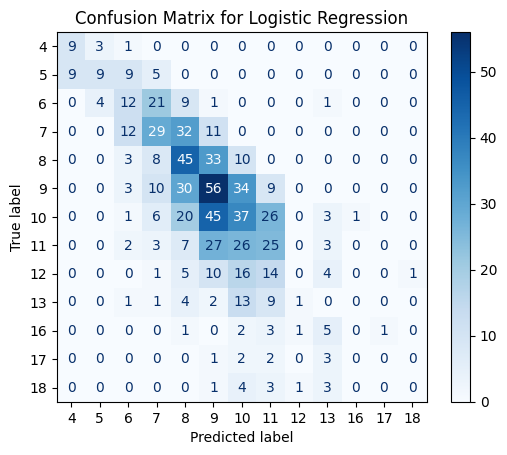

In [ ]:
# Знаходимо спільні класи
common_classes = np.intersect1d(np.unique(y_rings_test), np.unique(y_rings_pred_logreg))

# Створюємо матрицю плутанини тільки для спільних класів
cm = confusion_matrix(y_rings_test, y_rings_pred_logreg, labels=common_classes)

# Відображення матриці плутанини
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=common_classes)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Висновок:

⚠️ **Logistic Regression** добре класифікує класи **4**, **7**, **9**, але має проблеми з класами **12**, **13**, **14**, **19**, **20**, **22**, **23**.  
🚫 **Precision** та **recall** для деяких класів рівні нулю, що вказує на погану класифікацію.  
📊 Можливо, проблема з **небалансованістю класів**.

Аналіз класів

In [ ]:
# Для Logistic Regression
print("Classification report for Logistic Regression:\n")
print(classification_report(y_rings_test, y_rings_pred_logreg, zero_division=1))

# Для kNN
print("Classification report for kNN:\n")
print(classification_report(y_rings_test, y_rings_pred_knn, zero_division=1))

# Для SVM
print("Classification report for SVM:\n")
print(classification_report(y_rings_test, y_rings_pred_svm, zero_division=1))

Classification report for Logistic Regression:

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         3
           4       0.43      0.69      0.53        13
           5       0.56      0.28      0.38        32
           6       0.27      0.25      0.26        48
           7       0.35      0.35      0.35        84
           8       0.29      0.45      0.36        99
           9       0.28      0.39      0.33       142
          10       0.22      0.27      0.24       139
          11       0.24      0.27      0.25        93
          12       0.00      0.00      0.00        51
          13       0.00      0.00      0.00        31
          14       1.00      0.00      0.00        26
          15       1.00      0.00      0.00        21
          16       0.00      0.00      0.00        13
          17       0.00      0.00      0.00         8
          18       0.00      0.00      0.00        12
          19       1.00      0.00

Аналіз результатів:

1. **Logistic Regression**:
   - **Accuracy**: 0.29 — модель має досить низьку загальну точність. ⚠️
   - Найкращі результати виявлені для класів 4, 7 і 9, але для багатьох інших класів **precision** і **recall** рівні нулю або дуже низькі, що свідчить про слабку здатність моделі розпізнавати ці класи. ❗
   - Класи 12, 13, 14, 15, 19, 20, 21, 22, 23 мають **precision** і **recall** рівні нулю, що вказує на те, що модель не передбачає ці класи. 🚫

2. **kNN**:
   - **Accuracy**: 0.24 — точність моделі також низька. 📉
   - Класи 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23 мають нульові або дуже низькі показники **precision** і **recall**. 🛑
   - Класи 3, 4, 5, 6 показують кращі результати, але в цілому модель не ефективна. 🤔

3. **SVM**:
   - **Accuracy**: 0.23 — модель також показує низькі результати. ⚠️
   - Класи 2, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23 мають **precision** і **recall** рівні нулю, що вказує на серйозні проблеми з класифікацією для цих класів. 🚨
   - Класи 5, 6, 7, 8 мають найкращі результати серед всіх класів.

Precision-Recall Curve

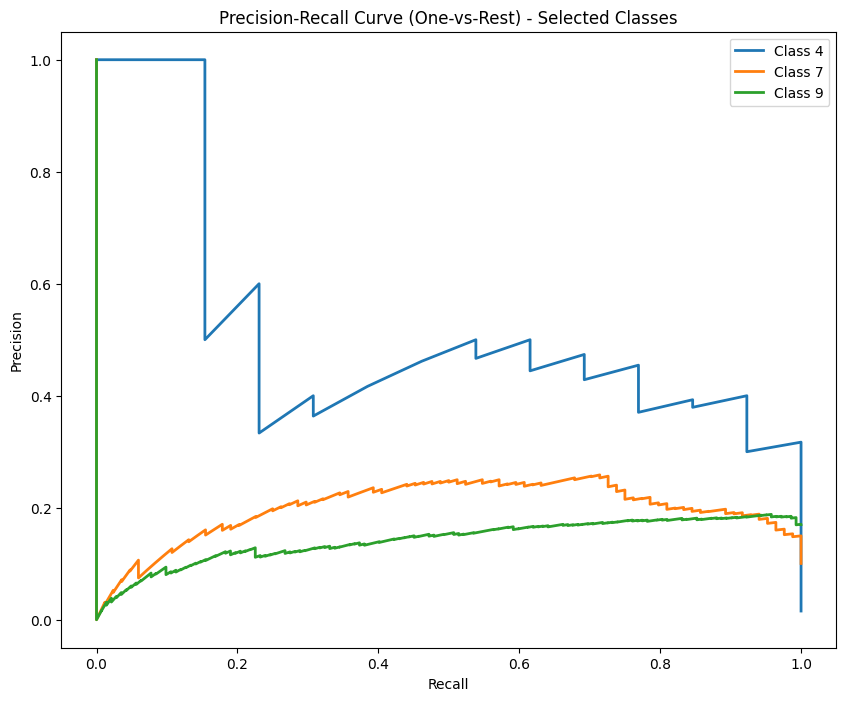

In [ ]:
# Вибір класів, для яких хочете побудувати графік (наприклад, класи 4, 7, 9)
selected_classes = [4, 7, 9]

# Бінаризація міток для вибраних класів
y_rings_test_bin = label_binarize(y_rings_test, classes=selected_classes)

# Отримуємо ймовірності для кожного класу
y_rings_pred_proba = logreg.predict_proba(X_test)

# Ініціалізація графіку
plt.figure(figsize=(10, 8))

# Обчислення Precision-Recall для кожного з вибраних класів
for i, class_label in enumerate(selected_classes):
    precision, recall, _ = precision_recall_curve(y_rings_test_bin[:, i], y_rings_pred_proba[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {class_label}')

# Оформлення графіку
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest) - Selected Classes')
plt.legend(loc='best')
plt.show()

Короткий висновок:

⚠️ **Precision-Recall Curve** для класів **4**, **7** та **9** показує високий **precision** для класу **4**, але більш низькі результати для класів **7** та **9**.  
📉 Клас **4** досягає високих результатів на початкових значеннях **recall**, в той час як **7** та **9** мають менші значення.  
🔧 Для покращення результатів можна оптимізувати пороги та застосувати **балансування класів**.

# Додатково: таргет - стать (infant, male, female)

1. Розбиття даних на тренувальну та тестову вибірки для таргету "Sex"

In [ ]:
y_sex = abalone_new['Sex']  # Таргет "Sex"
X_train_sex, X_test_sex, y_sex_train, y_sex_test = train_test_split(X, y_sex, test_size=0.2, random_state=42)

# Розміри вибірок
print('Розмір тренувальної вибірки для "Sex":', X_train_sex.shape)
print('Розмір тестової вибірки для "Sex":', X_test_sex.shape)

Розмір тренувальної вибірки для "Sex": (3341, 7)
Розмір тестової вибірки для "Sex": (836, 7)


2. Побудова моделей для "Sex"

In [ ]:
# Logistic Regression
logreg_sex = LogisticRegression(max_iter=1000, random_state=42)
logreg_sex.fit(X_train_sex, y_sex_train)

# kNN
knn_sex = KNeighborsClassifier(n_neighbors=5)
knn_sex.fit(X_train_sex, y_sex_train)

print('🔍 Моделі для "Sex" побудовані успішно!')

🔍 Моделі для "Sex" побудовані успішно!


3. Оцінка моделей

In [ ]:
# Оцінка Logistic Regression
y_sex_pred_logreg = logreg_sex.predict(X_test_sex)
logreg_sex_accuracy = accuracy_score(y_sex_test, y_sex_pred_logreg)
logreg_sex_precision = precision_score(y_sex_test, y_sex_pred_logreg, average='weighted', zero_division=1)
logreg_sex_recall = recall_score(y_sex_test, y_sex_pred_logreg, average='weighted', zero_division=1)
logreg_sex_f1 = f1_score(y_sex_test, y_sex_pred_logreg, average='weighted', zero_division=1)

# Оцінка kNN
y_sex_pred_knn = knn_sex.predict(X_test_sex)
knn_sex_accuracy = accuracy_score(y_sex_test, y_sex_pred_knn)
knn_sex_precision = precision_score(y_sex_test, y_sex_pred_knn, average='weighted', zero_division=1)
knn_sex_recall = recall_score(y_sex_test, y_sex_pred_knn, average='weighted', zero_division=1)
knn_sex_f1 = f1_score(y_sex_test, y_sex_pred_knn, average='weighted', zero_division=1)

print('📌 Оцінка моделей для "Sex" завершена!')

📌 Оцінка моделей для "Sex" завершена!


4. Порівняння результатів

In [ ]:
# Виведення результатів для Logistic Regression
print("📊 Logistic Regression для 'Sex' - Accuracy:", logreg_sex_accuracy)
print("📊 Logistic Regression для 'Sex' - Precision:", logreg_sex_precision)
print("📊 Logistic Regression для 'Sex' - Recall:", logreg_sex_recall)
print("📊 Logistic Regression для 'Sex' - F1 Score:", logreg_sex_f1)

print("______" * 10)

# Виведення результатів для kNN
print("📊 kNN для 'Sex' - Accuracy:", knn_sex_accuracy)
print("📊 kNN для 'Sex' - Precision:", knn_sex_precision)
print("📊 kNN для 'Sex' - Recall:", knn_sex_recall)
print("📊 kNN для 'Sex' - F1 Score:", knn_sex_f1)

📊 Logistic Regression для 'Sex' - Accuracy: 0.569377990430622
📊 Logistic Regression для 'Sex' - Precision: 0.5543566725802987
📊 Logistic Regression для 'Sex' - Recall: 0.569377990430622
📊 Logistic Regression для 'Sex' - F1 Score: 0.5569249469789728
____________________________________________________________
📊 kNN для 'Sex' - Accuracy: 0.5095693779904307
📊 kNN для 'Sex' - Precision: 0.5058894889962562
📊 kNN для 'Sex' - Recall: 0.5095693779904307
📊 kNN для 'Sex' - F1 Score: 0.5038070040767892


📌 Модель **Logistic Regression** 📊 показує кращі результати з **accuracy** 56.9% і **F1 score** 55.7%, в той час як модель **kNN** 📉 дає нижчі показники.

### Основний висновок:

1. **Результати для "Rings"**:
   - Моделі **Logistic Regression** 📊 і **kNN** 📉 показали низькі результати за основними метриками (**accuracy**, **precision**, **recall**, **F1 score**), що вказує на низьку ефективність класифікації кількості кілець. ⚠️ Можливі причини: низька якість даних, незбалансованість класів або недостатня кількість тренувальних даних для кожного класу.
   - Модель **SVM** ❌ також не продемонструвала високої точності на цьому завданні.

2. **Результати для "Sex"**:
   - Модель **Logistic Regression** 📈 показала кращі результати з **accuracy** 56.9% і **F1 score** 55.7%, що вказує на більш успішну класифікацію статі. У порівнянні з **kNN** 📉, яка показала нижчі результати, **Logistic Regression** працює ефективніше.

3. **Подальші кроки**:
   - Для покращення результатів класифікації **"Rings"** можна спробувати інші моделі, такі як **XGBoost** 🚀, або провести додаткове налаштування гіперпараметрів для вже використовуваних моделей 🔧.
   - Для подальшого вдосконалення моделей можна розглянути **балансування класів** ⚖️ або інші методи обробки даних.